<a href="https://colab.research.google.com/github/AhsanAyub/nids_ml_team_aust/blob/master/Test_Pruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Post pruning decision trees with cost complexity pruning

.. currentmodule:: sklearn.tree

The :class:`DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
:class:`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

See also :ref:`minimal_cost_complexity_pruning` for details on pruning.

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


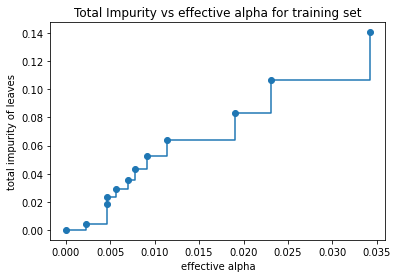

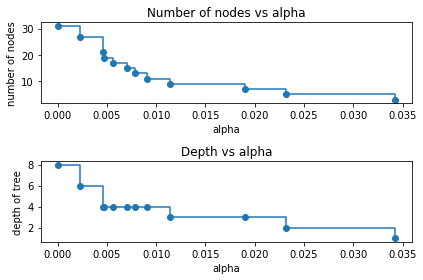

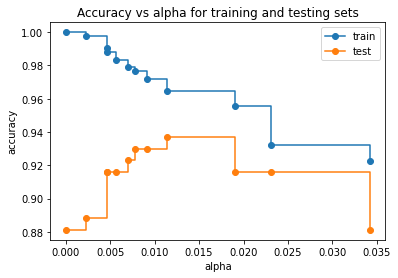

In [0]:
"""
========================================================
Post pruning decision trees with cost complexity pruning
========================================================

.. currentmodule:: sklearn.tree

The :class:`DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
:class:`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

See also :ref:`minimal_cost_complexity_pruning` for details on pruning.
"""

print(__doc__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

###############################################################################
# Total impurity of leaves vs effective alphas of pruned tree
# ---------------------------------------------------------------
# Minimal cost complexity pruning recursively finds the node with the "weakest
# link". The weakest link is characterized by an effective alpha, where the
# nodes with the smallest effective alpha are pruned first. To get an idea of
# what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
# :func:`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
# effective alphas and the corresponding total leaf impurities at each step of
# the pruning process. As alpha increases, more of the tree is pruned, which
# increases the total impurity of its leaves.
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

###############################################################################
# In the following plot, the maximum effective alpha value is removed, because
# it is the trivial tree with only one node.
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

###############################################################################
# Next, we train a decision tree using the effective alphas. The last value
# in ``ccp_alphas`` is the alpha value that prunes the whole tree,
# leaving the tree, ``clfs[-1]``, with one node.
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

###############################################################################
# For the remainder of this example, we remove the last element in
# ``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
# node. Here we show that the number of nodes and tree depth decreases as alpha
# increases.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

###############################################################################
# Accuracy vs alpha for training and testing sets
# ----------------------------------------------------
# When ``ccp_alpha`` is set to zero and keeping the other default parameters
# of :class:`DecisionTreeClassifier`, the tree overfits, leading to
# a 100% training accuracy and 88% testing accuracy. As alpha increases, more
# of the tree is pruned, thus creating a decision tree that generalizes better.
# In this example, setting ``ccp_alpha=0.015`` maximizes the testing accuracy.
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import skfeature

ModuleNotFoundError: ignored